In [40]:
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import statsmodels.formula.api as sm
import math

In [71]:
df = pd.read_csv('final_df.csv', encoding='utf-8',usecols = ['sum_polarity','count_checkin'])

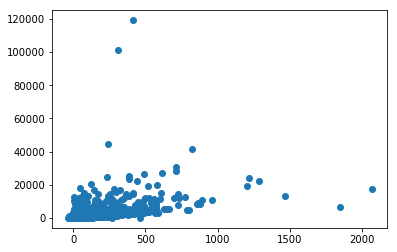

In [72]:
plt.scatter(df.sum_polarity,df.count_checkin)

In [73]:
df.count_checkin = df[df.count_checkin < 60000]

In [74]:
df.sum_polarity = df[df.sum_polarity < 2000]

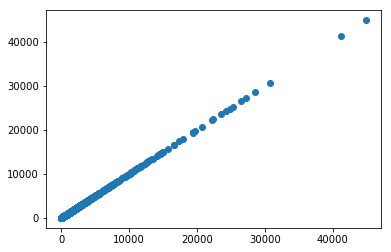

In [75]:
plt.scatter(df.sum_polarity,df.count_checkin)

In [76]:
results = sm.ols(formula='count_checkin~sum_polarity', data=df).fit()

In [77]:
Y_pred_ols = results.predict(df[['sum_polarity']])

In [78]:
residual = (df['count_checkin'].values-Y_pred).apply(math.fabs)

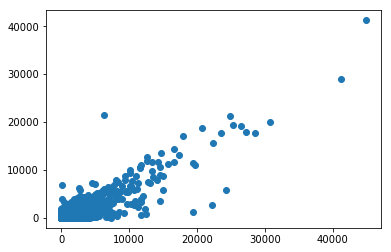

In [79]:
plt.scatter(df[['sum_polarity']], residual)

In [80]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          count_checkin   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.401e+36
Date:                Thu, 14 Sep 2017   Prob (F-statistic):               0.00
Time:                        11:17:00   Log-Likelihood:             3.4127e+06
No. Observations:              120453   AIC:                        -6.825e+06
Df Residuals:                  120451   BIC:                        -6.825e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1.056e-14   3.54e-16     29.814      0.000    9.86e-15    1.13e-14
sum_polarity     1.0000   6.45e-19   1.55e+18      0.000       1.000       1.000
==============================================================================
Omnibus:                   304912.930   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       8843348981.301
Skew:                         -28.125   Prob(JB):                         0.00
Kurtosis:                    1329.218   Cond. No.                         562.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
from sklearn.cross_decomposition import PLSRegression

In [28]:
pls = PLSRegression(n_components=1)
pls.fit(df['sum_polarity'],df['count_checkin'])

/home/juan/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: shapes (120456,1) and (120456,1) not aligned: 1 (dim 1) != 120456 (dim 0)

In [29]:
Y_pred = pls.predict(df['sum_polarity'])

/home/juan/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


AttributeError: 'PLSRegression' object has no attribute 'coef_'